In [87]:
import pandas as pd 
import numpy as np
# use kmeans and plot the cluster 
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None
import plotly.express as px
import matplotlib.pyplot as plt

In [88]:
df_mac = pd.read_csv('mac_data.csv')
df_windows = pd.read_csv('windows_data.csv')

In [89]:
df_mac.head()


,Keycode,Keyname,Keycount
0,49,1,0
1,50,2,0
2,51,3,1
3,52,4,0
4,53,5,0


In [90]:
df_windows.head()


,Keycode,Keyname,Keycount
0,49,1,72
1,50,2,41
2,51,3,30
3,52,4,19
4,53,5,12


In [91]:
# we don't need the keycode
df_mac = df_mac.drop('Keycode', axis=1)
df_windows = df_windows.drop('Keycode', axis=1)

In [92]:
df_mac.head()

,Keyname,Keycount
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [93]:
df_windows.head()

,Keyname,Keycount
0,1,72
1,2,41
2,3,30
3,4,19
4,5,12


In [94]:
#assign 1 to first row of the keyboard 
# assign 2 to second row of the keyboard
# assign 3 to third row of the keyboard (only for macbook pro characters)
df_mac['Row'] = 0
df_windows['Row'] = 0

first_row = ['Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P']
second_row = ['A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L']
third_row = ['Z', 'X', 'C', 'V', 'B', 'N', 'M']

In [95]:
for i in range(len(df_mac)):
    if df_mac['Keyname'][i] in first_row and df_windows['Keyname'][i] in first_row:
        df_mac['Row'][i] = 1
        df_windows['Row'][i] = 1
    elif df_mac['Keyname'][i] in second_row and df_windows['Keyname'][i] in first_row:
        df_mac['Row'][i] = 2
        df_windows['Row'][i] = 2
    elif df_mac['Keyname'][i] in third_row and df_windows['Keyname'][i] in third_row:
        df_mac['Row'][i] = 3
        df_windows['Row'][i] = 3
    else: 
        df_mac['Row'][i] = None
        df_windows['Row'][i] = None

In [96]:
#if the row is none, drop it
df_mac = df_mac.dropna()
df_windows = df_windows.dropna()

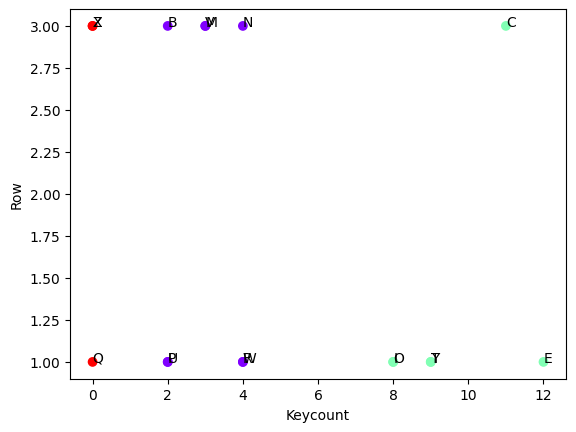

In [97]:
# export to csv to see 
#do kmeans on keycount and row
kmeans_mac = KMeans(n_clusters=3, random_state=0).fit(df_mac[['Keycount', 'Row']])

# plot the cluster
plt.scatter(df_mac['Keycount'], df_mac['Row'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Keycount')
plt.ylabel('Row')
# write the file to output.png

df_mac.head()
# reassign the indexes 
df_mac = df_mac.reset_index(drop=True)

# add the keyname to the annotation 
for i in range(len(df_mac)):
   plt.annotate(df_mac['Keyname'][i], (df_mac['Keycount'][i] , df_mac['Row'][i] ) )

# readjust the axis
plt.savefig('output.png')

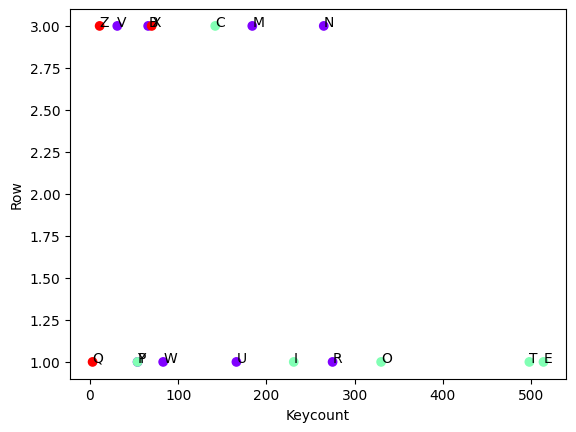

In [98]:
kmeans_windows = KMeans(n_clusters=3, random_state=0).fit(df_windows[['Keycount', 'Row']])

plt.scatter(df_windows['Keycount'], df_windows['Row'],
            c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Keycount')
plt.ylabel('Row')
# write the file to output.png

df_windows.head()
# reassign the indexes
df_windows = df_windows.reset_index(drop=True)

# add the keyname to the annotation
for i in range(len(df_windows)):
   plt.annotate(df_windows['Keyname'][i],
                (df_windows['Keycount'][i], df_windows['Row'][i]))

# readjust the axis
plt.savefig('output_windows.png')
